In [5]:
# This script runs on PyTorch version 1.5
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
B = 100
lr = 2e-4
t = 500
input_size = 28*28 # size of each image
output_size = 10 # class from 0 to 9

# Load data
train_data = datasets.MNIST(
    root='./data', train=True, 
    download=True, transform= transforms.ToTensor())
test_data = datasets.MNIST(
    root='./data', train=False, 
    download=True, transform= transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=B,shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=B,shuffle=True)

In [6]:
# Define a linear model
class linear_model(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out
       
# Initialize model, SGD optimizer and loss function
model = linear_model(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

Current device: cuda


Text(0, 0.5, 'loss')

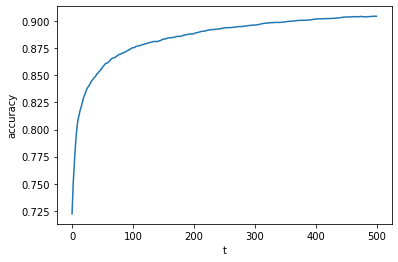

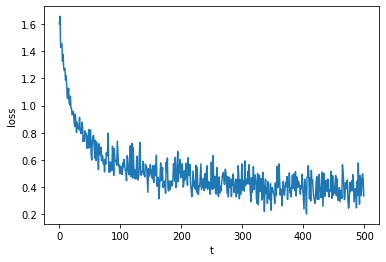

In [8]:
# Accuracy test
def acc(model, test_loeader):
    total = 0
    correct = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    correct = correct.cpu()
    correct = correct.data.numpy()
    #print(correct)
    return correct/total

# Train
losses = []
accuracy = []

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Current device:', device)

model = model.to(device)

for epoch in range(t):
    for i,(images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        images, labels = images.to(device), labels.to(device)
        # Clear gradients of all optimized tensors (W0=0)
        optimizer.zero_grad()
        outputs = model(images)

        # Calculate losses and store them for plotting
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    loss = loss.cpu()
    loss = loss.data.numpy()
    losses.append(loss.tolist())

    # Calculate accuracies and store them for plotting
    cur_acc = acc(model, test_loader)#, device)
    accuracy.append(cur_acc)
plt.figure()
plt.plot(accuracy)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(losses)
plt.xlabel('t')
plt.ylabel('loss')